### Practical sheet 4 (Experimental Setup)

#### 00-Libraries

In [1]:
##########################################################
# Import Libraries to start work
##########################################################
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### 01-Data & Transformation

In [2]:
df = pd.read_csv("banknote.csv",names=["Variance","Skewness","Curtosis","Entropy","Class"])
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
X = df[['Variance', 'Skewness', 'Curtosis', 'Entropy']]
y = df['Class']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [5]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

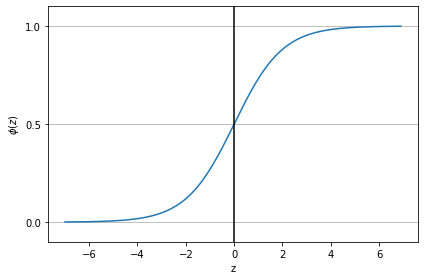

In [6]:
##########################################################
# The sigmoid function used in the Logistic Regression
##########################################################

import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('./figures/sigmoid.png', dpi=300)
plt.show()

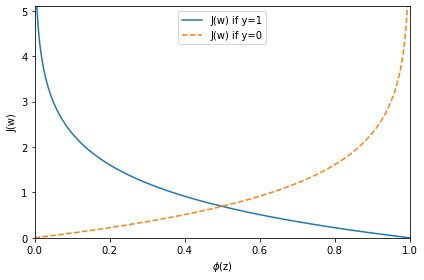

In [7]:
##########################################################
# Learning the weights of the logistic cost function
##########################################################
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/log_cost.png', dpi=300)
plt.show()


#### 03-Training a logistic regression model with scikit-learn

In [11]:
from sklearn.linear_model import LogisticRegression


In [12]:
lr = LogisticRegression(C=1000.0, random_state=0)

lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, random_state=0)

In [13]:
y_pred = lr.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 8


##### 03.01-Confusion Matrix


In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

[[224   8]
 [  0 180]]


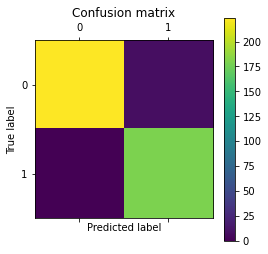

In [15]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [16]:
##########################################################
# Accuracy
##########################################################
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


In [17]:
lr.predict_proba(X_test_std[0,:])

ValueError: Expected 2D array, got 1D array instead:
array=[-0.77491408 -2.19276019  2.08404846  0.08591101].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [19]:
##########################################################
# Calculating our Banknote Authentication classifier's precision and recall:
##########################################################
from sklearn.model_selection import cross_val_score


In [20]:

precisions = cross_val_score(lr, X_train_std, y_train, cv=5,scoring='precision')
print('Precision', np.mean(precisions), precisions)

recalls = cross_val_score(lr, X_train_std, y_train, cv=5,scoring='recall')
print('Recalls', np.mean(recalls), recalls)

Precision 0.9887129724208377 [0.96629213 1.         0.97727273 1.         1.        ]
Recalls 0.9883720930232558 [1.         0.95348837 1.         1.         0.98837209]


In [21]:
##########################################################
# Calculating the F1 measure
##########################################################
f1s = cross_val_score(lr, X_train_std, y_train, cv=5, scoring='f1')
print('F1', np.mean(f1s), f1s)

F1 0.9883410825915362 [0.98285714 0.97619048 0.98850575 1.         0.99415205]


In [22]:
##########################################################
# ROC AUC
##########################################################
from sklearn.metrics import roc_auc_score, roc_curve, auc
roc_auc_score(y_test,lr.predict(X_test_std))

0.9827586206896552

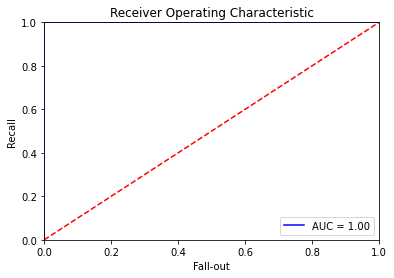

In [23]:
##########################################################
# Plotting the ROC curve for our SMS spam classifier:
##########################################################
import matplotlib.pyplot as plt
%matplotlib inline
y_pred = lr.predict_proba(X_test_std)

false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred[:, 1])
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [25]:
features=list(df.columns[:-1])

Feature ranking:
1. feature 0 - Variance (0.502450) 
2. feature 1 - Skewness (0.280639) 
3. feature 2 - Curtosis (0.153946) 
4. feature 3 - Entropy (0.062965) 


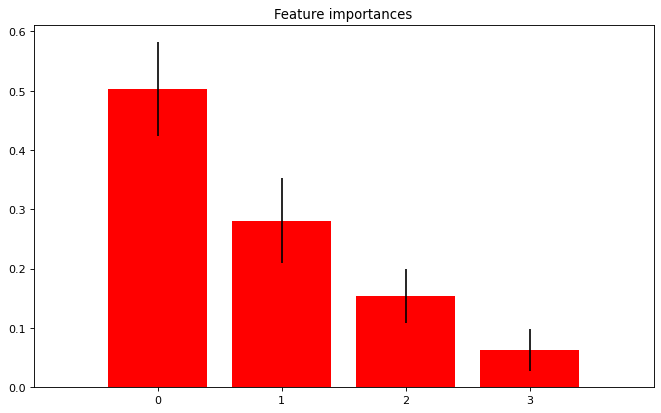

In [26]:
##########################################################
# Finding the most important features with forests of trees
##########################################################
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f) " % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [27]:
##########################################################
#Plotting our model decison regions
##########################################################
X_train, X_test, y_train, y_test = train_test_split(
         X[['Variance','Skewness']], y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [28]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, random_state=0)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([108, 113, 124, 131, 140, 141, 142], dtype='int64'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

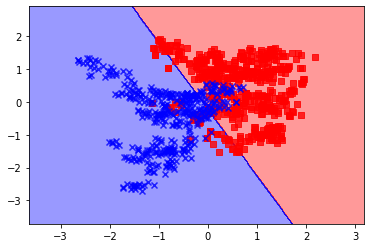

In [32]:

plot_decision_regions(X_train_std, y_train,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()